In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   0.8.5     
✔ tidyr   1.0.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "chapter8-brands1.csv" "chapter8-brands2.csv" "rintro-chapter8.csv"

In [2]:
brand.ratings<-read_csv("../input/rintro-chapter8.csv")

head(brand.ratings)

Parsed with column specification:
cols(
  perform = col_double(),
  leader = col_double(),
  latest = col_double(),
  fun = col_double(),
  serious = col_double(),
  bargain = col_double(),
  value = col_double(),
  trendy = col_double(),
  rebuy = col_double(),
  brand = col_character()
)



perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,4,8,8,2,9,7,4,6,a
1,1,4,7,1,1,1,2,2,a
2,3,5,9,2,9,5,1,6,a
1,6,10,8,3,4,5,2,1,a
1,1,5,8,1,9,9,1,1,a
2,8,9,5,3,8,7,1,2,a


In [3]:
# check it out
head(brand.ratings)
tail(brand.ratings)


perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,4,8,8,2,9,7,4,6,a
1,1,4,7,1,1,1,2,2,a
2,3,5,9,2,9,5,1,6,a
1,6,10,8,3,4,5,2,1,a
1,1,5,8,1,9,9,1,1,a
2,8,9,5,3,8,7,1,2,a


perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,2,8,7,1,3,3,5,2,j
2,2,3,6,4,8,5,1,2,j
3,2,6,7,1,3,3,2,1,j
1,1,10,10,1,6,5,5,2,j
1,1,7,5,1,1,2,5,1,j
7,4,7,8,4,1,2,5,1,j


In [4]:
#Sacamos las estadísticas de las numéricas y las categóricas
summary(brand.ratings)
str(brand.ratings)


    perform           leader           latest            fun        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 4.000   1st Qu.: 4.000  
 Median : 4.000   Median : 4.000   Median : 7.000   Median : 6.000  
 Mean   : 4.488   Mean   : 4.417   Mean   : 6.195   Mean   : 6.068  
 3rd Qu.: 7.000   3rd Qu.: 6.000   3rd Qu.: 9.000   3rd Qu.: 8.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
    serious          bargain           value            trendy     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 3.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 5.00  
 Mean   : 4.323   Mean   : 4.259   Mean   : 4.337   Mean   : 5.22  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.00  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.00  
     rebuy           brand          
 Min

tibble [1,000 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ perform: num [1:1000] 2 1 2 1 1 2 1 2 2 3 ...
 $ leader : num [1:1000] 4 1 3 6 1 8 1 1 1 1 ...
 $ latest : num [1:1000] 8 4 5 10 5 9 5 7 8 9 ...
 $ fun    : num [1:1000] 8 7 9 8 8 5 7 5 10 8 ...
 $ serious: num [1:1000] 2 1 2 3 1 3 1 2 1 1 ...
 $ bargain: num [1:1000] 9 1 9 4 9 8 5 8 7 3 ...
 $ value  : num [1:1000] 7 1 5 5 9 7 1 7 7 3 ...
 $ trendy : num [1:1000] 4 2 1 2 1 1 1 7 5 4 ...
 $ rebuy  : num [1:1000] 6 2 6 1 1 2 1 1 1 1 ...
 $ brand  : chr [1:1000] "a" "a" "a" "a" ...
 - attr(*, "spec")=
  .. cols(
  ..   perform = col_double(),
  ..   leader = col_double(),
  ..   latest = col_double(),
  ..   fun = col_double(),
  ..   serious = col_double(),
  ..   bargain = col_double(),
  ..   value = col_double(),
  ..   trendy = col_double(),
  ..   rebuy = col_double(),
  ..   brand = col_character()
  .. )


In [5]:
# Transformamos el data set
brand.sc <- brand.ratings
brand.sc[, 1:9] <- data.frame(scale(brand.ratings[, 1:9]))
summary(brand.sc)

    perform            leader            latest             fun          
 Min.   :-1.0888   Min.   :-1.3100   Min.   :-1.6878   Min.   :-1.84677  
 1st Qu.:-1.0888   1st Qu.:-0.9266   1st Qu.:-0.7131   1st Qu.:-0.75358  
 Median :-0.1523   Median :-0.1599   Median : 0.2615   Median :-0.02478  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7842   3rd Qu.: 0.6069   3rd Qu.: 0.9113   3rd Qu.: 0.70402  
 Max.   : 1.7206   Max.   : 2.1404   Max.   : 1.2362   Max.   : 1.43281  
    serious           bargain             value             trendy        
 Min.   :-1.1961   Min.   :-1.22196   Min.   :-1.3912   Min.   :-1.53897  
 1st Qu.:-0.8362   1st Qu.:-0.84701   1st Qu.:-0.9743   1st Qu.:-0.80960  
 Median :-0.1163   Median :-0.09711   Median :-0.1405   Median :-0.08023  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.6036   3rd Qu.: 0.65279   3rd Qu.: 0.6933   3rd Qu.: 0.64914  
 Max.   : 2.0434   Max.   : 2.15

corrplot 0.84 loaded



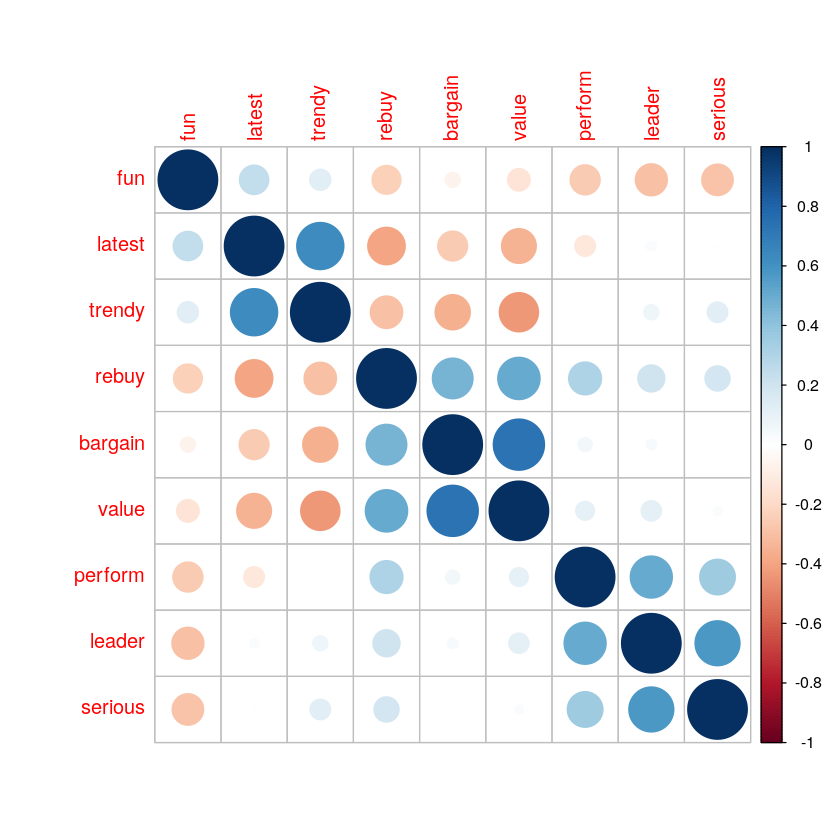

In [6]:
library(corrplot)

corrplot(cor(brand.sc[, 1:9]), order="hclust")

In [7]:
brand.sc

perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-0.7766617,-0.1598662,0.5864084,0.70401755,-0.8361532,1.77763492,1.1102404,-0.44491428,0.8932671,a
-1.0888247,-1.3099826,-0.7131117,0.33961923,-1.1960986,-1.22195997,-1.3912400,-1.17428196,-0.6786944,a
-0.7766617,-0.5432383,-0.3882316,1.06841586,-0.8361532,1.77763492,0.2764136,-1.53896580,0.8932671,a
-1.0888247,0.6068781,1.2361685,0.70401755,-0.4762078,-0.09711188,0.2764136,-1.17428196,-1.0716848,a
-1.0888247,-1.3099826,-0.3882316,0.70401755,-1.1960986,1.77763492,1.9440672,-1.53896580,-1.0716848,a
-0.7766617,1.3736224,0.9112885,-0.38917740,-0.4762078,1.40268556,1.1102404,-1.53896580,-0.6786944,a
-1.0888247,-1.3099826,-0.3882316,0.33961923,-1.1960986,0.27783748,-1.3912400,-1.53896580,-1.0716848,a
-0.7766617,-1.3099826,0.2615284,-0.38917740,-0.8361532,1.40268556,1.1102404,0.64913723,-1.0716848,a
-0.7766617,-1.3099826,0.5864084,1.43281418,-1.1960986,1.02773620,1.1102404,-0.08023044,-1.0716848,a


In [8]:
# Agregar atributos de personalidad por marca
brand.mean <- aggregate(. ~ brand, data=brand.sc, mean)
brand.mean

rownames(brand.mean) <- brand.mean[, 1] # Usamos la marcas para cada fila
brand.mean2 <- brand.mean[, -1]          # removemos la columna de marcas
brand.mean2

brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603


,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




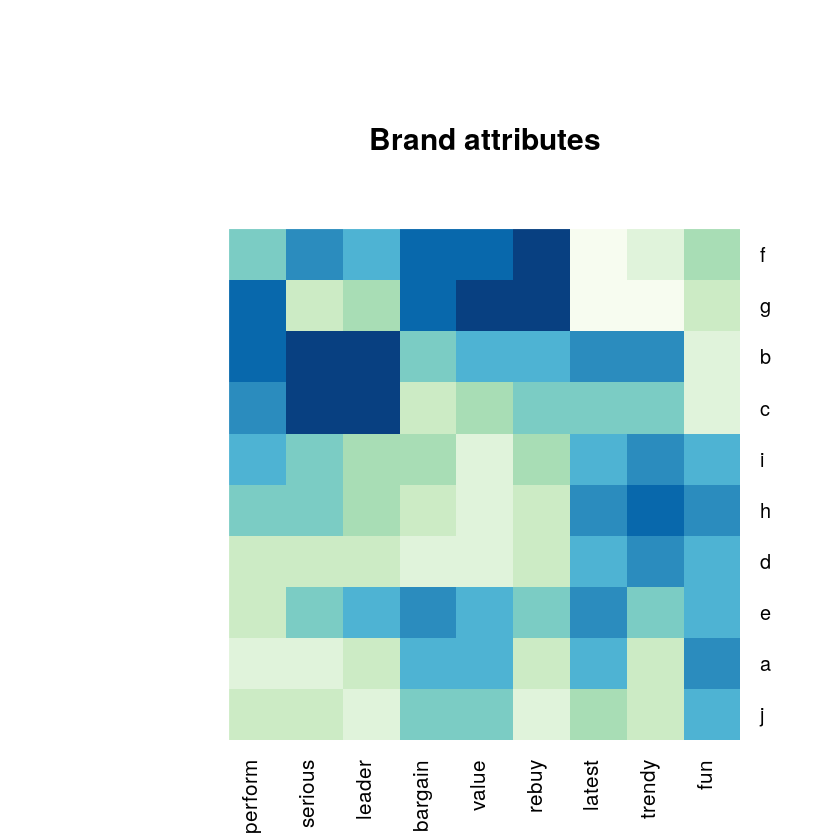

In [9]:
#### basic visualization of the raw data

# heatmap of attribute by brand
library(gplots)
library(RColorBrewer)
heatmap.2(as.matrix(brand.mean2), 
          col=brewer.pal(9, "GnBu"), trace="none", key=FALSE, dend="none",
          main="\n\n\n\n\nBrand attributes")

In [10]:
# Test Bartlett:
library(psych)
mat_cor<-data.frame(cor(brand.mean2))
cortest.bartlett(mat_cor,n=10)




Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




$chisq
[1] 78.54649

$p.value
[1] 5.319756e-05

$df
[1] 36

La explicación del Test de Bartlett es muy similar a la prueba Chi Cuadrado, es decir a valores pequeños de K-squared expresa que existe una homogeneidad en las varianzas y por lo consiguiente existen un buen número de correlaciones positivas entre las variables y el p-valor y se puede corroborar fijando una H0: Las varianzas son homogéneas (correlaciones aceptables), con un alfa=0.05. Otra explicación es que dicho test proporciona la probabilidad de que la matriz de correlación de las variables sea una matriz identidad

NOTA IMPORTANTE: Las variables que intervienen para el cálculo del Test de Bartlett son provenientes de una distribución Chi Cuadrado

In [11]:
KMO(brand.mean2)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = brand.mean2)
Overall MSA =  0.46
MSA for each item = 
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
   0.83    0.36    0.35    0.83    0.34    0.41    0.80    0.37    0.42 

La medida de adecuación de la muestra MSA o KMO (Kaiser-Meyer-Olkin) contrasta si las correlaciones parciales entre las variables son suficientemente pequeñas. El estadístico KMO varía entre 0 y 1. Los valores pequeños indican que el análisis factorial puede no ser una buena idea, dado que las correlaciones entre los pares de variables no pueden ser explicadas por otras variables. Los menores que 0.5 indican que no debe utilizarse el AF con la matriz de datos que se están analizando

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.726 1.4479 1.0389 0.8528 0.79846 0.73133 0.62458
Proportion of Variance 0.331 0.2329 0.1199 0.0808 0.07084 0.05943 0.04334
Cumulative Proportion  0.331 0.5640 0.6839 0.7647 0.83554 0.89497 0.93831
                           PC8     PC9
Standard deviation     0.55861 0.49310
Proportion of Variance 0.03467 0.02702
Cumulative Proportion  0.97298 1.00000

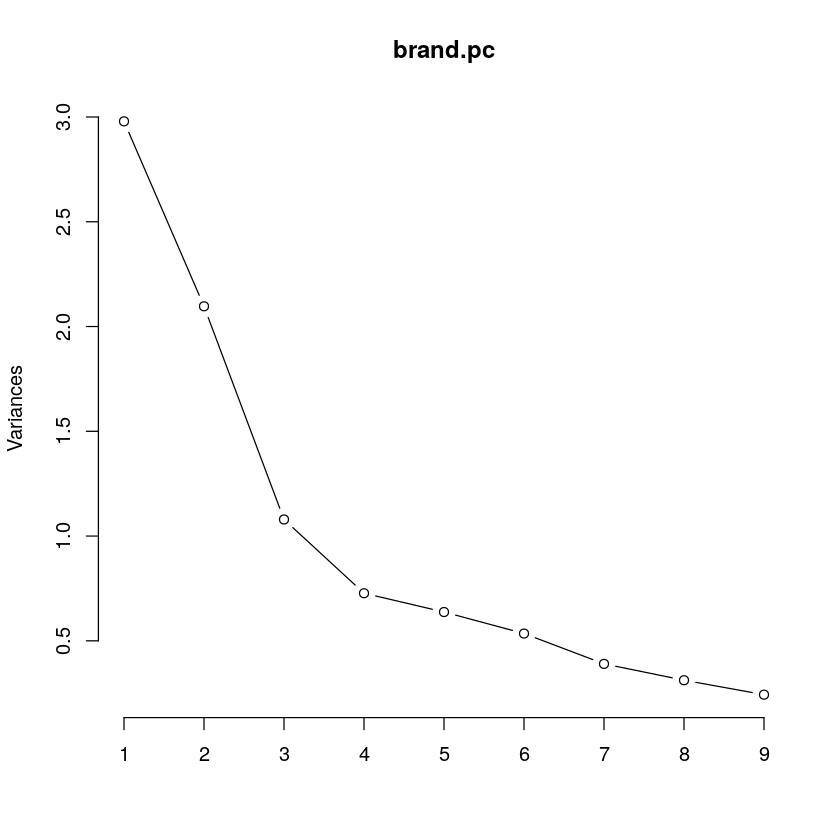

In [12]:
## PCA for brand ratings
brand.pc <- prcomp(brand.sc[, 1:9])
summary(brand.pc)

plot(brand.pc, type="l")

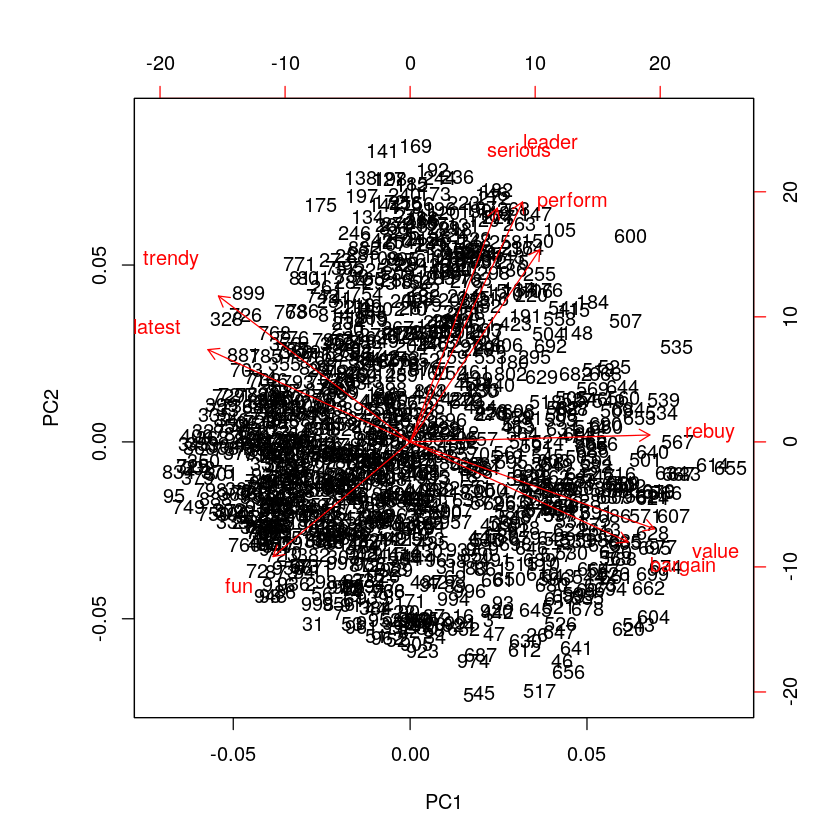

In [13]:
#Hacemos un biplot

biplot(brand.pc)    # Muy denso tiene todas las observaciones

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1345 1.7349 0.7690 0.61498 0.50983 0.36662 0.21506
Proportion of Variance 0.5062 0.3345 0.0657 0.04202 0.02888 0.01493 0.00514
Cumulative Proportion  0.5062 0.8407 0.9064 0.94842 0.97730 0.99223 0.99737
                           PC8     PC9
Standard deviation     0.14588 0.04867
Proportion of Variance 0.00236 0.00026
Cumulative Proportion  0.99974 1.00000

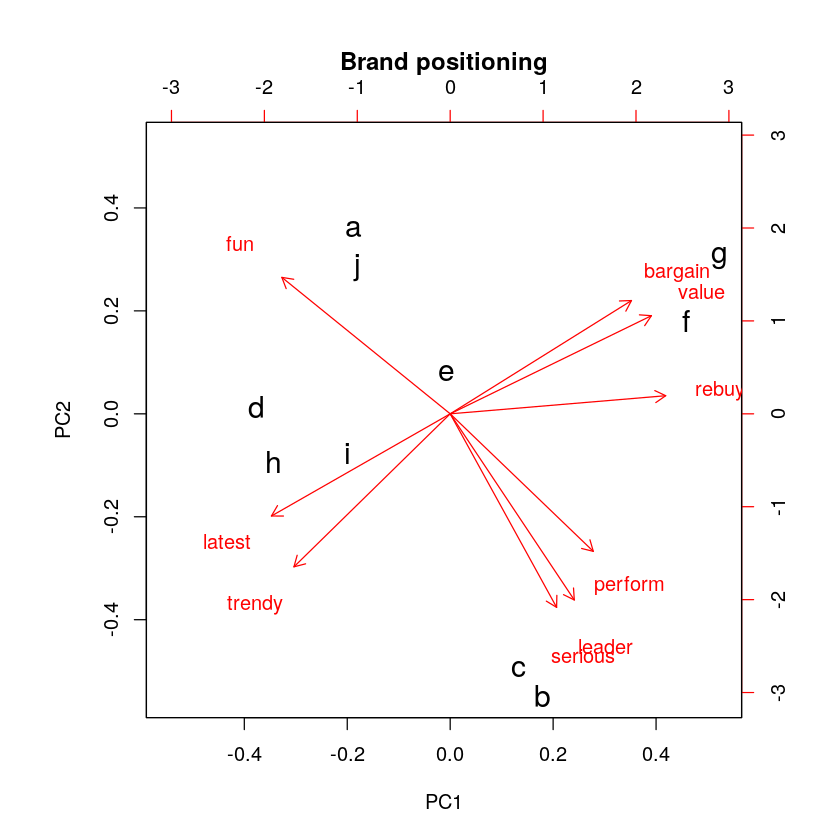

In [14]:
# probamos otra vez usando solamente las medias
brand.mean2
brand.mu.pc <- prcomp(brand.mean2, scale=TRUE)
summary(brand.mu.pc)

biplot(brand.mu.pc, main="Brand positioning", cex=c(1.5, 1))


In [15]:
# comparamos las marcas c y e
brand.mean2["c", ] - brand.mean2["e", ]


,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
c,1.214314,0.9699315,-0.5587936,-1.140567,1.180621,-1.158594,-0.8588416,-0.113052,-0.1689859


In [16]:
#### Vamos a hacer un análisis factorial exploratorio

library(nFactors)


Loading required package: lattice


Attaching package: ‘nFactors’


The following object is masked from ‘package:lattice’:

    parallel




  noc naf nparallel nkaiser
1   3   2         3       3

eigen() decomposition
$values
[1] 2.9792956 2.0965517 1.0792549 0.7272110 0.6375459 0.5348432 0.3901044
[8] 0.3120464 0.2431469

$vectors
            [,1]        [,2]        [,3]        [,4]        [,5]       [,6]
 [1,]  0.2374679 -0.41991179  0.03854006  0.52630873  0.46793435 -0.3370676
 [2,]  0.2058257 -0.52381901 -0.09512739  0.08923461 -0.29452974 -0.2968860
 [3,] -0.3703806 -0.20145317 -0.53273054 -0.21410754  0.10586676 -0.1742059
 [4,] -0.2510601  0.25037973 -0.41781346  0.75063952 -0.33149429  0.1405367
 [5,]  0.1597402 -0.51047254 -0.04067075 -0.09893394 -0.55515540  0.3924874
 [6,]  0.3991731  0.21849698 -0.48989756 -0.16734345 -0.01257429 -0.1393966
 [7,]  0.4474562  0.18980822 -0.36924507 -0.15118500 -0.06327757 -0.2195327
 [8,] -0.3510292 -0.31849032 -0.37090530 -0.16764432  0.36649697  0.2658186
 [9,]  0.4390184 -0.01509832 -0.12461593  0.13031231  0.35568769  0.6751400
              [,7]        [,8]        [,9]
 [1,]  0.364179109 -0.14444718  0.05223384
 [2,] -0.6136743

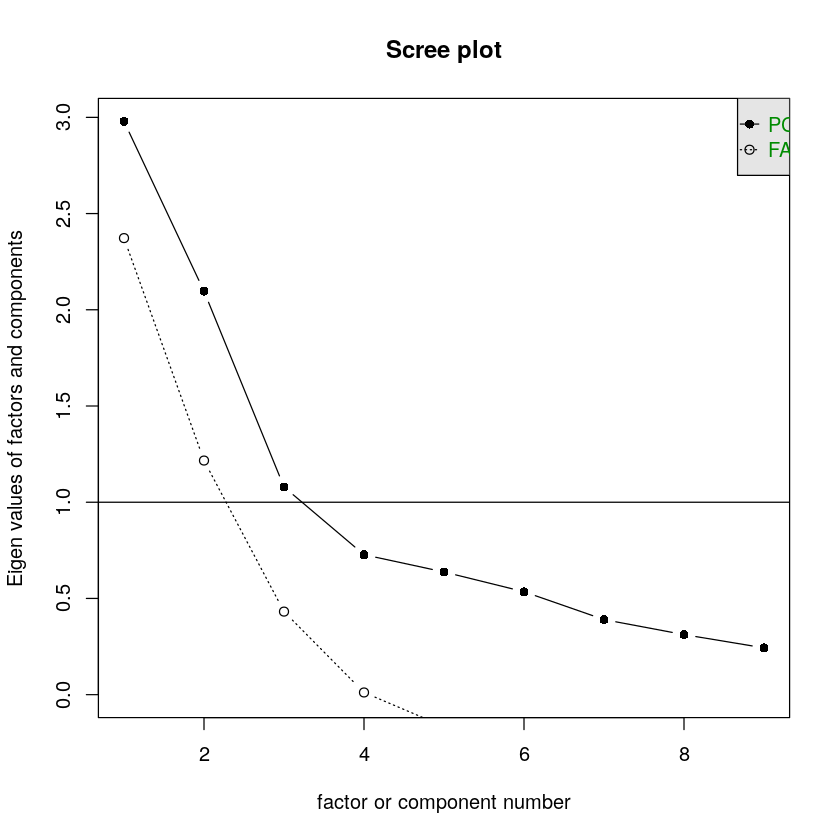

In [17]:
nScree(data.frame(brand.sc[, 1:9]))
scree(brand.sc[, 1:9])
eigen(cor(brand.sc[, 1:9]))

In [18]:
factanal(brand.sc[, 1:9], factors=2)
factanal(brand.sc[, 1:9], factors=3)


Call:
factanal(x = brand.sc[, 1:9], factors = 2)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.635   0.332   0.796   0.835   0.527   0.354   0.225   0.708   0.585 

Loadings:
        Factor1 Factor2
perform          0.600 
leader           0.818 
latest  -0.451         
fun     -0.137  -0.382 
serious          0.686 
bargain  0.803         
value    0.873   0.117 
trendy  -0.534         
rebuy    0.569   0.303 

               Factor1 Factor2
SS loadings      2.245   1.759
Proportion Var   0.249   0.195
Cumulative Var   0.249   0.445

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 556.19 on 19 degrees of freedom.
The p-value is 8.66e-106 


Call:
factanal(x = brand.sc[, 1:9], factors = 3)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.624   0.327   0.005   0.794   0.530   0.302   0.202   0.524   0.575 

Loadings:
        Factor1 Factor2 Factor3
perform          0.607         
leader           0.810   0.106 
latest  -0.163           0.981 
fun             -0.398   0.205 
serious          0.682         
bargain  0.826          -0.122 
value    0.867          -0.198 
trendy  -0.356           0.586 
rebuy    0.499   0.296  -0.298 

               Factor1 Factor2 Factor3
SS loadings      1.853   1.752   1.510
Proportion Var   0.206   0.195   0.168
Cumulative Var   0.206   0.401   0.568

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 64.57 on 12 degrees of freedom.
The p-value is 3.28e-09 

In [19]:

library(GPArotation)
(brand.fa.ob <- factanal(brand.sc[, 1:9], factors=2, rotation="none"))


Call:
factanal(x = brand.sc[, 1:9], factors = 2, rotation = "none")

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.635   0.332   0.796   0.835   0.527   0.354   0.225   0.708   0.585 

Loadings:
        Factor1 Factor2
perform  0.235   0.556 
leader   0.237   0.782 
latest  -0.440   0.101 
fun     -0.240  -0.327 
serious  0.140   0.674 
bargain  0.780  -0.193 
value    0.870  -0.138 
trendy  -0.488   0.231 
rebuy    0.632   0.127 

               Factor1 Factor2
SS loadings      2.386   1.619
Proportion Var   0.265   0.180
Cumulative Var   0.265   0.445

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 556.19 on 19 degrees of freedom.
The p-value is 8.66e-106 

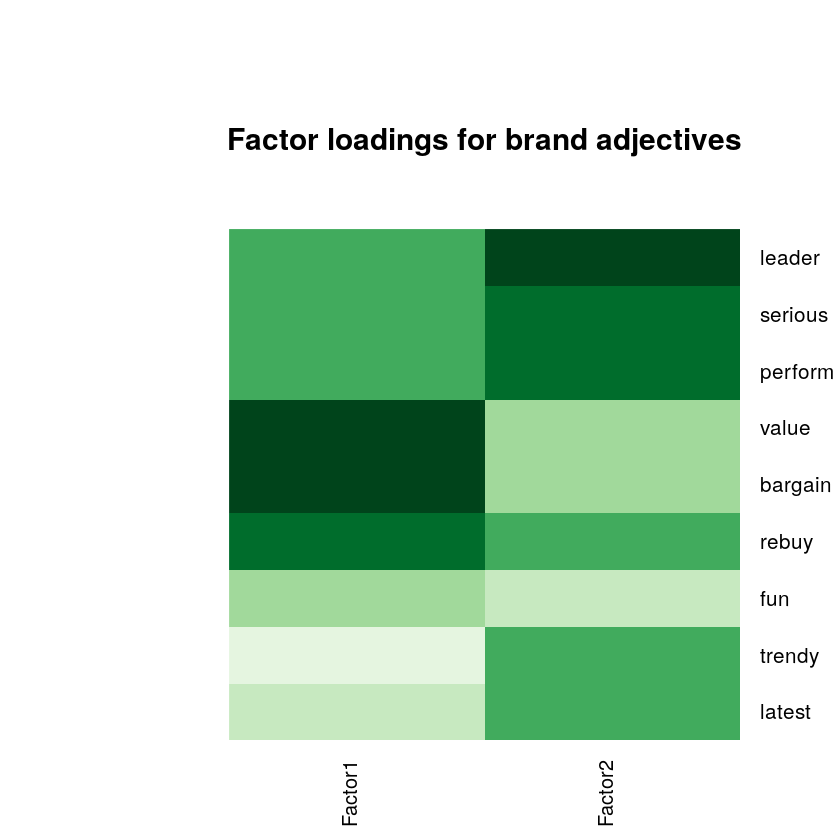

In [20]:
library(gplots)
library(RColorBrewer)
heatmap.2(brand.fa.ob$loadings, 
          col=brewer.pal(9, "Greens"), trace="none", key=FALSE, dend="none",
          Colv=FALSE, cexCol = 1.2,
          main="\n\n\n\n\nFactor loadings for brand adjectives")

Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph



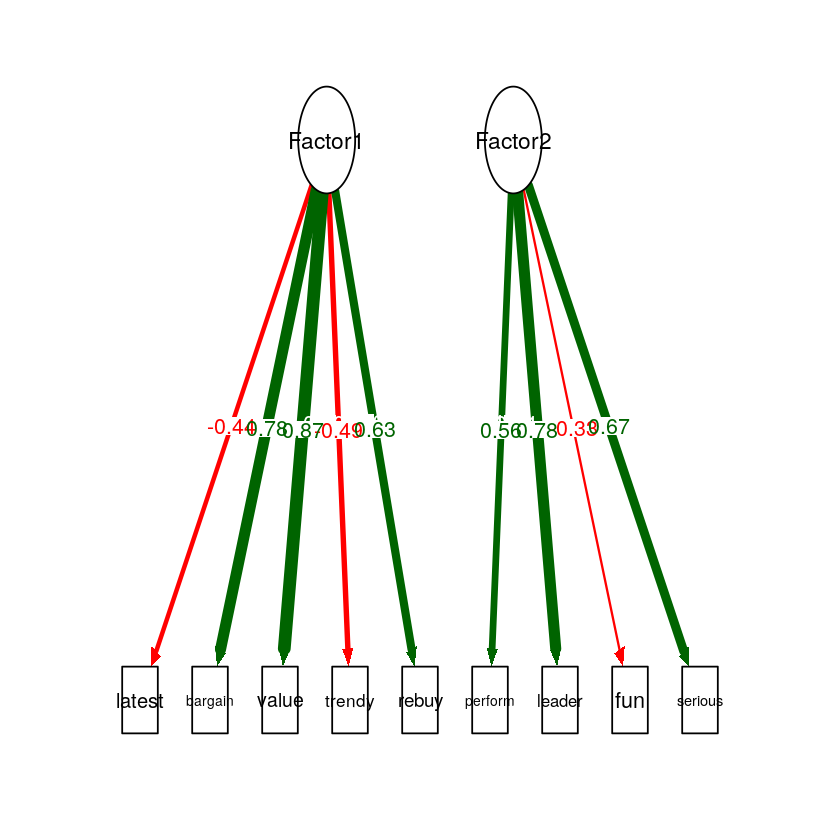

In [21]:
# plot the structure
library(semPlot)
semPaths(brand.fa.ob, what="est", residuals=FALSE,
         cut=0.3, posCol=c("white", "darkgreen"), negCol=c("white", "red"),
         edge.label.cex=0.75, nCharNodes=7)

In [22]:
# usamos los scores de regresión
brand.fa.ob <- factanal(brand.sc[, 1:9], factors=3, rotation="oblimin", 
                        scores="Bartlett")
brand.scores <- data.frame(brand.fa.ob$scores)
brand.scores$brand <- brand.sc$brand
head(brand.scores)

,Factor1,Factor2,Factor3,brand
,<dbl>,<dbl>,<dbl>,<chr>
1,1.6521364,-0.6886749,0.5256104,a
2,-1.4005333,-1.6681901,-0.6764121,a
3,1.1457311,-1.0618008,-0.4285853,a
4,0.2009725,-0.3245462,1.2113424,a
5,2.0002009,-1.9071519,-0.4559905,a
6,1.4175063,0.3339462,0.8555525,a


In [23]:
brand.fa.mean <- aggregate(. ~ brand, data=brand.scores, mean)
rownames(brand.fa.mean) <- brand.fa.mean[, 1]
brand.fa.mean <- brand.fa.mean[, -1]
names(brand.fa.mean) <- c("Value","Leader","Latest")
brand.fa.mean



,Value,Leader,Latest
,<dbl>,<dbl>,<dbl>
a,0.23158792,-1.06993703,0.39326652
b,0.09686823,1.51913070,0.72391174
c,-0.58937138,1.45069457,-0.07690784
d,-1.04380419,-0.78186861,0.37914638
e,0.52169760,-0.05373430,0.43709349
f,1.15218492,0.45442899,-1.28395765
g,1.36873947,0.04408369,-1.31900029
h,-0.91592078,-0.31418560,0.52676516
i,-0.66918513,-0.20741901,0.37331202


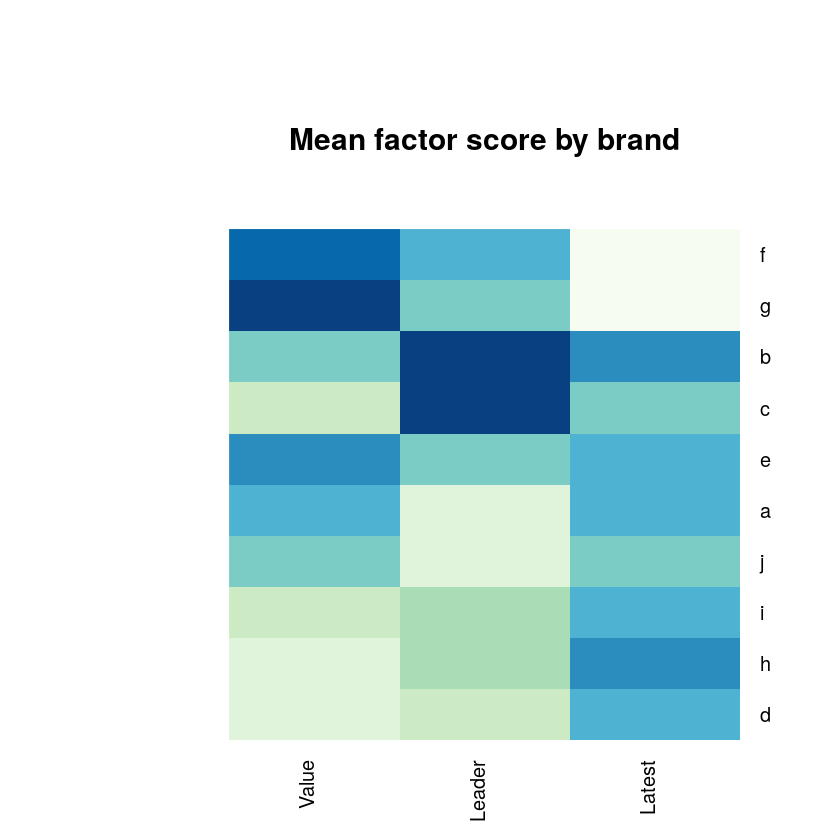

In [24]:
heatmap.2(as.matrix(brand.fa.mean), 
          col=brewer.pal(9, "GnBu"), trace="none", key=FALSE, dend="none",
          cexCol=1.2, main="\n\n\n\n\nMean factor score by brand")



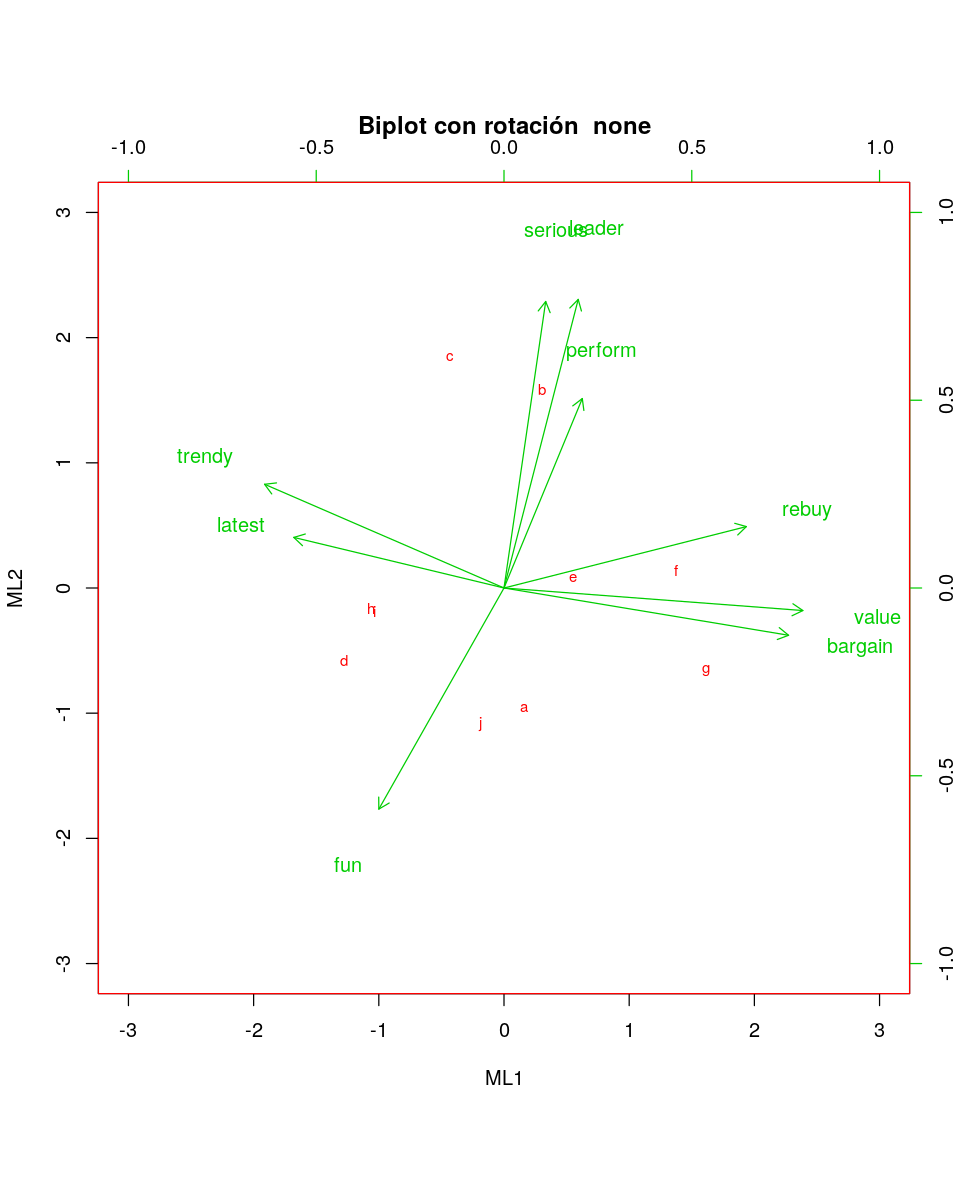

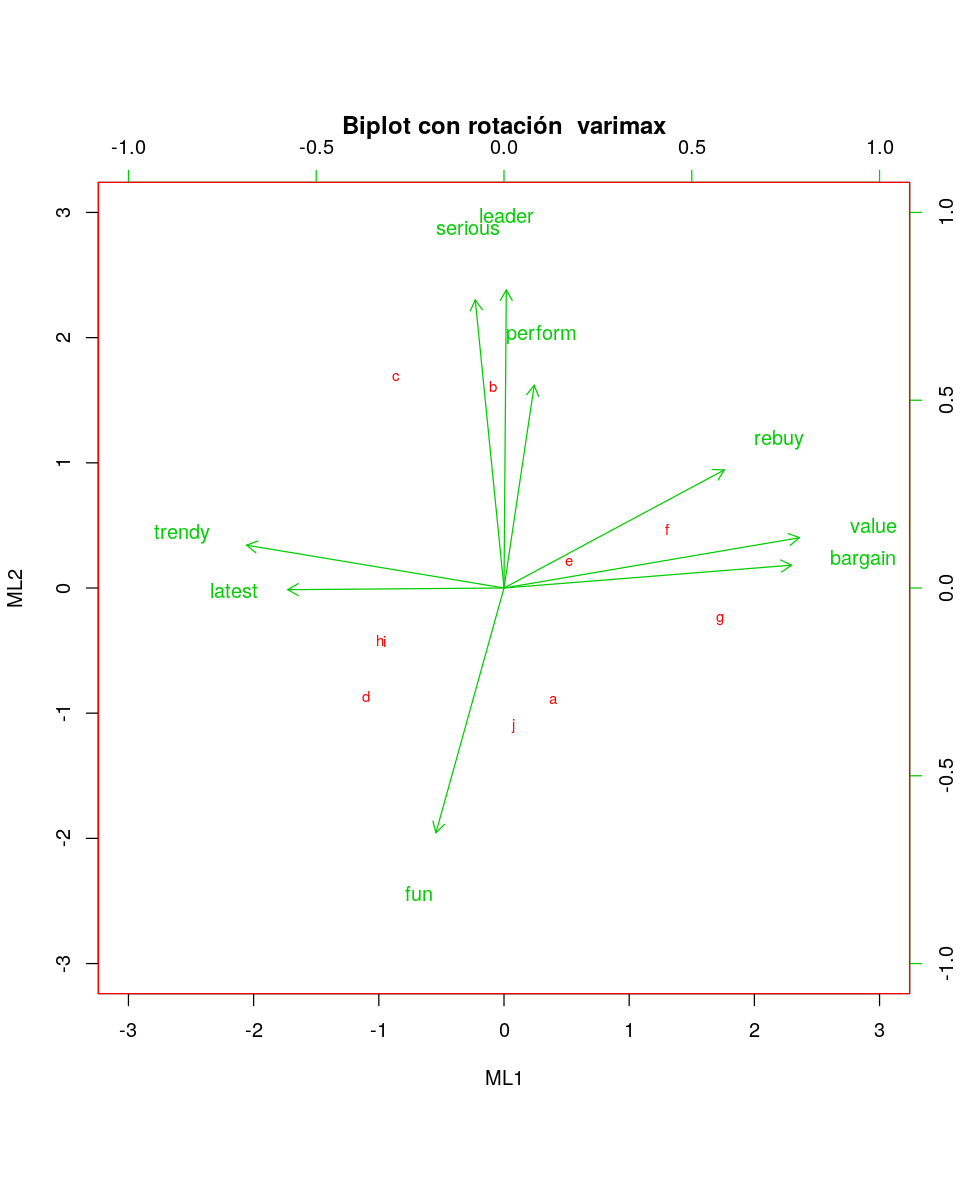

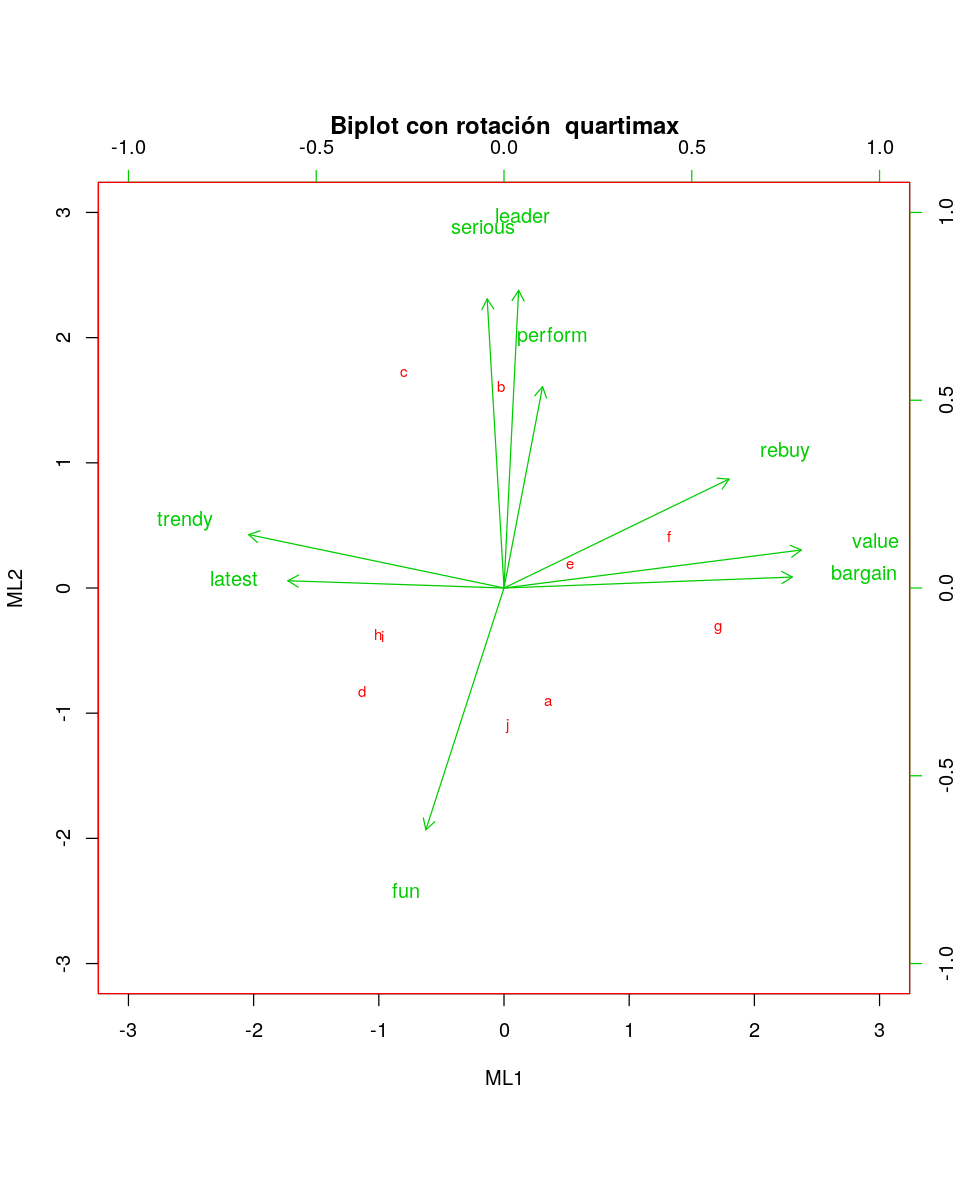

$none
NULL

$varimax
NULL

$quartimax
NULL

$Promax
NULL

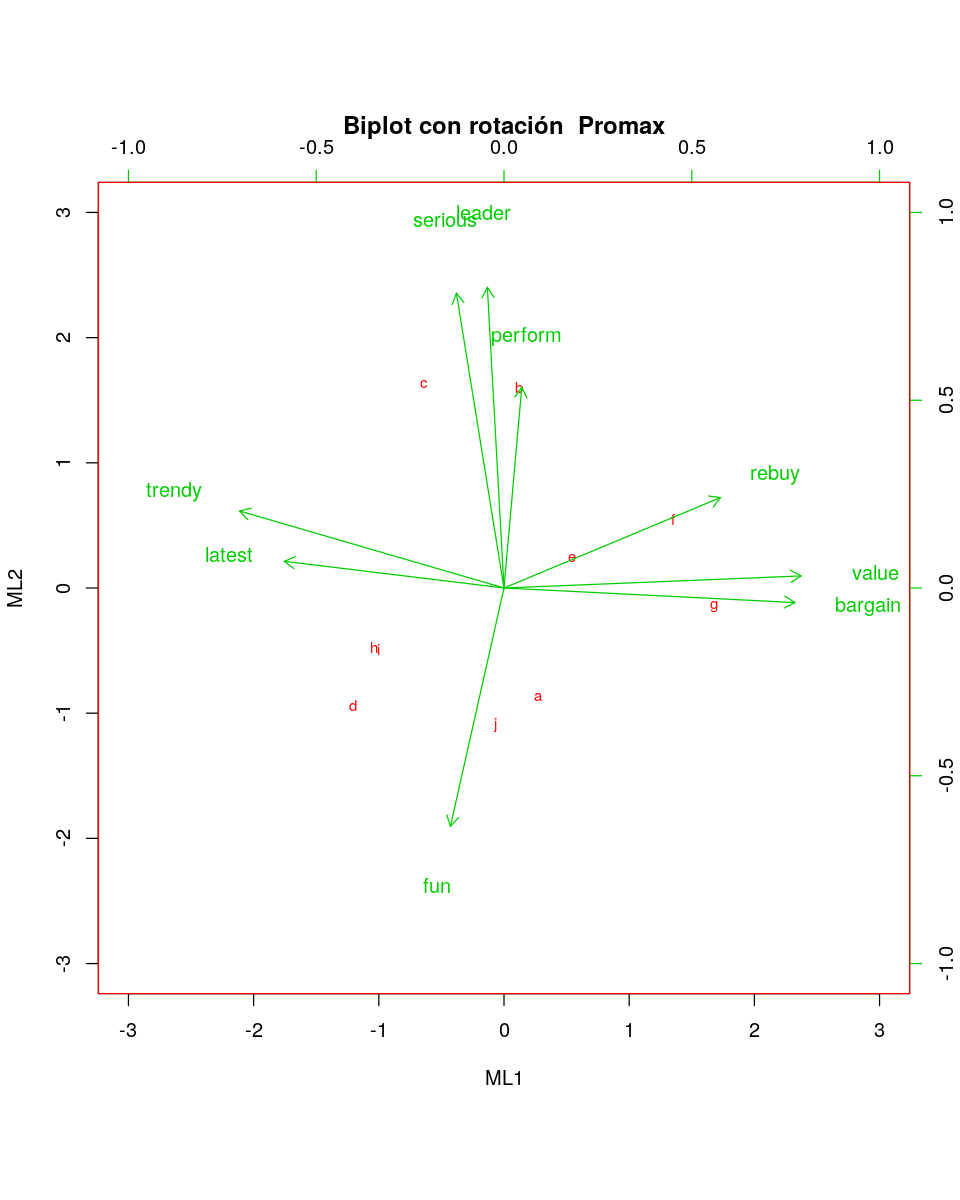

In [25]:
rot<-c("none", "varimax", "quartimax","Promax")
bi_mod<-function(tipo){
biplot.psych(fa(brand.mean2, nfactors=2, rotate=tipo,fm="mle"),
             cex=c(1.5, 1),cuts=c(0),
             main = paste("Biplot con rotación ",tipo),
             col=c(2,3,4),pch = c(21,18),labels =brand.mean[,"brand"],)
}
require(graphics)
options(repr.plot.width = 8, repr.plot.height = 10)
sapply(rot,bi_mod)